# Carga e Análise - Análise Descritiva
A análise descritiva é a primeira etapa de uma análise de dados. Ela resume e organiza os dados de forma clara, ajudando  a entender o que está acontecendo no  conjunto de dados, sem tirar conclusões causais.

```
Para começar, realize uma análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.
```

In [2]:
# Import das bibliotecas a serem utilizadas
import pandas as pd
import numpy as np
import sqlalchemy
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, MetaData, Table, inspect
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Engine para conexão com o banco de dados
engine = create_engine('sqlite:///clened_telecomX_db/teleconX.db')

In [4]:
# Exibindo as tabelas do banco
print(inspect(engine).get_table_names())

['teleconX_no_NaN', 'teleconX_origin', 'teleconX_ptbr']


In [5]:
# Carregando a tabela a ser analisada em um dataframe pandas
df = pd.read_sql_table('teleconX_ptbr', con=engine)

# amostra de 5 linhas aleatórias
df.sample(5)

,id_cliente,cancelou,genero,idoso,tem_parceiro,tem_dependente,meses_contrato,servicos_telefonicos,multiplas_linhas,servicos_internet,...,seguro_protecao,suporte_tecnico,tem_tv_cabo,tem_stream_filmes,tipo_contrato,fatura_online,forma_pagamento,valor_mensal,valor_total,valor_diario
3062,4381-MHQDC,0,feminino,0,0,0,47,1,1,dsl-cabo,...,1,1,0,0,dois anos,1,cheque via correios,65.00,2879.90,2.166667
3291,4700-UBQMV,0,masculino,0,1,1,21,1,1,dsl-cabo,...,0,0,1,1,anual,1,tranferência bancária automática,75.90,1549.75,2.530000
3550,5028-HTLJB,1,masculino,1,0,0,1,1,0,sem serviço,...,0,0,0,0,mensal,0,cheque via correios,20.05,20.05,0.668333
3706,5214-NLTIT,0,masculino,0,1,1,72,1,1,fibra optica,...,1,0,0,1,dois anos,1,cartão de crédito automático,90.80,6511.80,3.026667
3621,5134-IKDAY,1,feminino,0,1,1,1,1,0,fibra optica,...,0,0,0,0,mensal,1,electronic check,69.80,69.80,2.326667


A coluna __id_cliente__ não terá importância para essa análise nesse momento, então ela será excluída.

In [22]:
df.drop(columns='id_cliente', inplace=True)

##### Reverificando os tipos


In [25]:
df.dtypes

cancelou                  int64
genero                   object
idoso                     int64
tem_parceiro              int64
tem_dependente            int64
meses_contrato            int64
servicos_telefonicos      int64
multiplas_linhas          int64
servicos_internet        object
seguranca_online          int64
backup_online             int64
seguro_protecao           int64
suporte_tecnico           int64
tem_tv_cabo               int64
tem_stream_filmes         int64
tipo_contrato            object
fatura_online             int64
forma_pagamento          object
valor_mensal            float64
valor_total             float64
valor_diario            float64
dtype: object

As colunas genero, servicos_internet, tipo_contrato, forma_pagamento voltaram a ser do tipo **object** devido a incompatibilidade do banco de dados com o formato. Vontando as 4 colunas para **category** para otimizar as buscas e consultas.

In [27]:
col_categoricas = ['genero', 'servicos_internet', 'tipo_contrato', 'forma_pagamento']

df[col_categoricas] = df[col_categoricas].apply(lambda col: col.astype('category'))

In [28]:
df.dtypes

cancelou                   int64
genero                  category
idoso                      int64
tem_parceiro               int64
tem_dependente             int64
meses_contrato             int64
servicos_telefonicos       int64
multiplas_linhas           int64
servicos_internet       category
seguranca_online           int64
backup_online              int64
seguro_protecao            int64
suporte_tecnico            int64
tem_tv_cabo                int64
tem_stream_filmes          int64
tipo_contrato           category
fatura_online              int64
forma_pagamento         category
valor_mensal             float64
valor_total              float64
valor_diario             float64
dtype: object

In [29]:
df.head()

,cancelou,genero,idoso,tem_parceiro,tem_dependente,meses_contrato,servicos_telefonicos,multiplas_linhas,servicos_internet,seguranca_online,...,seguro_protecao,suporte_tecnico,tem_tv_cabo,tem_stream_filmes,tipo_contrato,fatura_online,forma_pagamento,valor_mensal,valor_total,valor_diario
0,0,feminino,0,1,1,9,1,0,dsl-cabo,0,...,0,1,1,0,anual,1,cheque via correios,65.6,593.30,2.186667
1,0,masculino,0,0,0,9,1,1,dsl-cabo,0,...,0,0,0,1,mensal,0,cheque via correios,59.9,542.40,1.996667
2,1,masculino,0,0,0,4,1,0,fibra optica,0,...,1,0,0,0,mensal,1,electronic check,73.9,280.85,2.463333
3,1,masculino,1,1,0,13,1,0,fibra optica,0,...,1,0,1,1,mensal,1,electronic check,98.0,1237.85,3.266667
4,1,feminino,1,1,0,3,1,0,fibra optica,0,...,0,1,1,0,mensal,1,cheque via correios,83.9,267.40,2.796667


Utilizando o método describe para um primeiro insight das colunas numéricas

In [6]:
df.describe()

,cancelou,idoso,tem_parceiro,tem_dependente,meses_contrato,servicos_telefonicos,multiplas_linhas,seguranca_online,backup_online,seguro_protecao,suporte_tecnico,tem_tv_cabo,tem_stream_filmes,fatura_online,valor_mensal,valor_total,valor_diario
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


### % de clientes que __Cancelaram__ o serviço

É muito importante para uma análise inicial saber a quantidade ou no caso a porcentagem de clientes que deixaram a empresa. Isso me ajudará a entender que análises fazer apartir de então

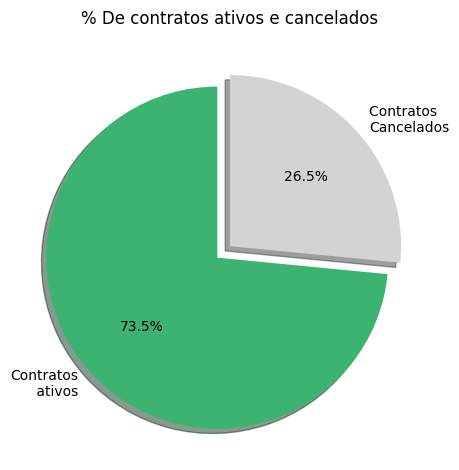

In [30]:
per_cancelados = df['cancelou'].value_counts()

labels_pie = ['Contratos\n ativos', 'Contratos \nCancelados']
explode = [0.1, 0]

per_cancelados.plot(kind='pie', labels=labels_pie,autopct='%1.1f%%', startangle=90, colors=['mediumseagreen', 'lightgray'], explode=explode, shadow=True)

plt.title("% De contratos ativos e cancelados")
plt.ylabel('')  
plt.tight_layout()

plt.ylabel("")
plt.show()

Agora que sei que 26,5% dos clientes cancelaram o contrato, vou buscar entender se existe um padrão no tipo de cliente que optou por de desligar da empresa.

Vou criar um novo dataframe apenas com os clientes que cancelaram o serviço

In [32]:
cancel = df[df['cancelou'] == 1]
cancel.head()

,cancelou,genero,idoso,tem_parceiro,tem_dependente,meses_contrato,servicos_telefonicos,multiplas_linhas,servicos_internet,seguranca_online,...,seguro_protecao,suporte_tecnico,tem_tv_cabo,tem_stream_filmes,tipo_contrato,fatura_online,forma_pagamento,valor_mensal,valor_total,valor_diario
2,1,masculino,0,0,0,4,1,0,fibra optica,0,...,1,0,0,0,mensal,1,electronic check,73.9,280.85,2.463333
3,1,masculino,1,1,0,13,1,0,fibra optica,0,...,1,0,1,1,mensal,1,electronic check,98.0,1237.85,3.266667
4,1,feminino,1,1,0,3,1,0,fibra optica,0,...,0,1,1,0,mensal,1,cheque via correios,83.9,267.40,2.796667
18,1,masculino,1,0,0,45,1,0,dsl-cabo,1,...,1,0,0,1,anual,0,cartão de crédito automático,62.7,2791.50,2.090000
19,1,masculino,1,0,0,1,0,0,dsl-cabo,0,...,0,0,0,0,mensal,1,electronic check,25.1,25.10,0.836667


Do total de cancelamento, qual percentual de homens e mulheres que cancelaram o contrato?

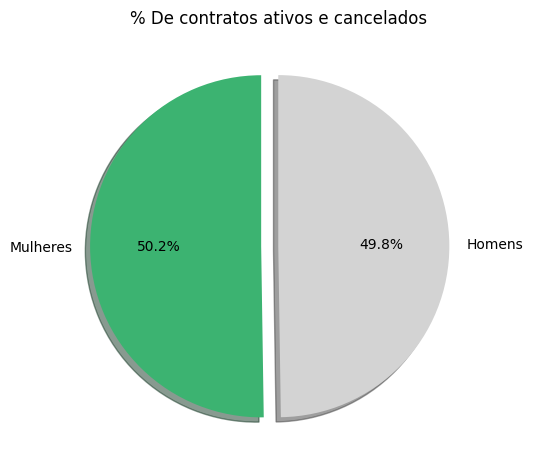

In [35]:
can_genero = cancel['genero'].value_counts()

labels_pie = ['Mulheres', 'Homens']
explode = [0.1, 0]

can_genero.plot(kind='pie', labels=labels_pie,autopct='%1.1f%%', startangle=90, colors=['mediumseagreen', 'lightgray'], explode=explode, shadow=True)

plt.title("% De contratos ativos e cancelados")
plt.ylabel('')  
plt.tight_layout()

plt.ylabel("")
plt.show()

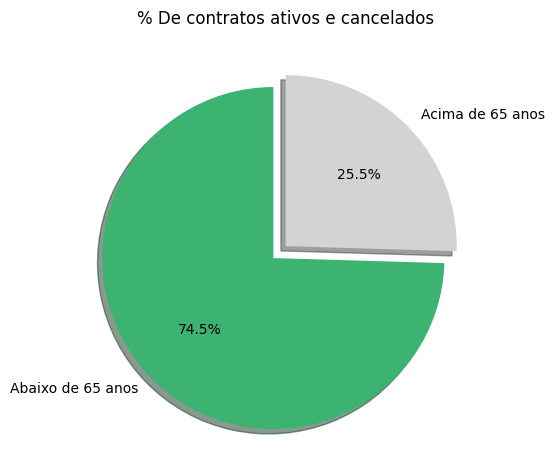

In [38]:
can_idoso = cancel['idoso'].value_counts()

labels_pie = ['Abaixo de 65 anos', 'Acima de 65 anos']
explode = [0.1, 0]

can_idoso.plot(kind='pie', labels=labels_pie,autopct='%1.1f%%', startangle=90, colors=['mediumseagreen', 'lightgray'], explode=explode, shadow=True)

plt.title("% De contratos ativos e cancelados")
plt.ylabel('')  
plt.tight_layout()

plt.ylabel("")
plt.show()

O cancelamento de contrato se dá majoritariarmente no público abaixo de 65 anos

In [40]:
cancel

,cancelou,genero,idoso,tem_parceiro,tem_dependente,meses_contrato,servicos_telefonicos,multiplas_linhas,servicos_internet,seguranca_online,...,seguro_protecao,suporte_tecnico,tem_tv_cabo,tem_stream_filmes,tipo_contrato,fatura_online,forma_pagamento,valor_mensal,valor_total,valor_diario
2,1,masculino,0,0,0,4,1,0,fibra optica,0,...,1,0,0,0,mensal,1,electronic check,73.90,280.85,2.463333
3,1,masculino,1,1,0,13,1,0,fibra optica,0,...,1,0,1,1,mensal,1,electronic check,98.00,1237.85,3.266667
4,1,feminino,1,1,0,3,1,0,fibra optica,0,...,0,1,1,0,mensal,1,cheque via correios,83.90,267.40,2.796667
18,1,masculino,1,0,0,45,1,0,dsl-cabo,1,...,1,0,0,1,anual,0,cartão de crédito automático,62.70,2791.50,2.090000
19,1,masculino,1,0,0,1,0,0,dsl-cabo,0,...,0,0,0,0,mensal,1,electronic check,25.10,25.10,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,1,masculino,1,0,0,21,1,0,fibra optica,0,...,1,0,1,1,mensal,1,tranferência bancária automática,96.80,2030.30,3.226667
7023,1,masculino,1,0,0,9,1,1,fibra optica,0,...,0,0,0,1,mensal,1,electronic check,83.85,790.15,2.795000
7036,1,feminino,0,0,0,1,1,0,fibra optica,0,...,0,0,0,0,mensal,1,cheque via correios,70.15,70.15,2.338333
7037,1,feminino,0,0,0,4,1,0,sem serviço,0,...,0,0,0,0,mensal,0,tranferência bancária automática,20.95,85.50,0.698333
